In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None


In [2]:
df = pd.read_pickle('../datos/bikes_procesado.pkl')

In [3]:
df.head()

,day,month,year,weekday,workingday,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,January,2018,Monday,0,1,2,14.110847,80.5833,10.749882,331,654,985
1,1,February,2018,Thursday,1,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,March,2018,Thursday,1,0,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,April,2018,Sunday,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,May,2018,Tuesday,1,0,1,9.305237,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         730 non-null    category
 1   month       730 non-null    category
 2   year        730 non-null    category
 3   weekday     730 non-null    category
 4   workingday  730 non-null    category
 5   holiday     730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  casual      730 non-null    int64   
 11  registered  730 non-null    int64   
 12  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(3)
memory usage: 45.5 KB


In [5]:
df_num = df.select_dtypes(include = np.number)

In [6]:
df_num.drop(['casual', 'registered', 'cnt'], axis = 1, inplace = True)

In [7]:
df_num

,temp,hum,windspeed
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300
...,...,...,...
725,10.420847,65.2917,23.458911
726,10.386653,59.0000,10.416557
727,10.386653,75.2917,8.333661
728,10.489153,48.3333,23.500518


In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df_num)

StandardScaler()

In [10]:
X_escaladas = scaler.transform(df_num)

In [11]:
num_estandar = pd.DataFrame(X_escaladas, columns = df_num.columns)
num_estandar.head(2)

,temp,hum,windspeed
0,-0.827613,1.252343,-0.387833
1,-0.722069,0.480996,0.748899


In [12]:
df_ext = df.drop(['temp', 'hum', 'windspeed'], axis = 1)

In [13]:
df_ext

,day,month,year,weekday,workingday,holiday,weathersit,casual,registered,cnt
0,1,January,2018,Monday,0,1,2,331,654,985
1,1,February,2018,Thursday,1,0,2,131,670,801
2,1,March,2018,Thursday,1,0,1,120,1229,1349
3,1,April,2018,Sunday,0,0,1,108,1454,1562
4,1,May,2018,Tuesday,1,0,1,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
725,27,December,2019,Friday,1,0,2,247,1867,2114
726,28,December,2019,Saturday,0,0,2,644,2451,3095
727,29,December,2019,Sunday,0,0,2,159,1182,1341
728,30,December,2019,Monday,1,0,1,364,1432,1796


In [14]:
df_final_estandar = pd.concat([df_ext, num_estandar], axis = 1)

In [15]:
df_final_estandar

,day,month,year,weekday,workingday,holiday,weathersit,casual,registered,cnt,temp,hum,windspeed
0,1,January,2018,Monday,0,1,2,331,654,985,-0.827613,1.252343,-0.387833
1,1,February,2018,Thursday,1,0,2,131,670,801,-0.722069,0.480996,0.748899
2,1,March,2018,Thursday,1,0,1,120,1229,1349,-1.635432,-1.338073,0.745931
3,1,April,2018,Sunday,0,0,1,108,1454,1562,-1.615560,-0.261577,-0.389769
4,1,May,2018,Tuesday,1,0,1,82,1518,1600,-1.468226,-1.340294,-0.046477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,December,2019,Friday,1,0,2,247,1867,2114,-1.319509,0.177576,2.059845
726,28,December,2019,Saturday,0,0,2,644,2451,3095,-1.324068,-0.264634,-0.452029
727,29,December,2019,Sunday,0,0,2,159,1182,1341,-1.324068,0.880424,-0.853182
728,30,December,2019,Monday,1,0,1,364,1432,1796,-1.310404,-1.014341,2.067858


In [16]:
df_final_estandar['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [17]:
df_final_estandar.groupby(['holiday'])['casual'].sum()

holiday
0    593794
1     26158
Name: casual, dtype: int64

In [18]:
df_final_estandar.groupby(['holiday'])['registered'].sum()

holiday
0    2613612
1      57281
Name: registered, dtype: int64

In [19]:
df_final_estandar['holiday'].value_counts()

0    708
1     22
Name: holiday, dtype: int64

In [20]:
df_final_estandar.dtypes

day           category
month         category
year          category
weekday       category
workingday    category
holiday       category
weathersit    category
casual           int64
registered       int64
cnt              int64
temp           float64
hum            float64
windspeed      float64
dtype: object

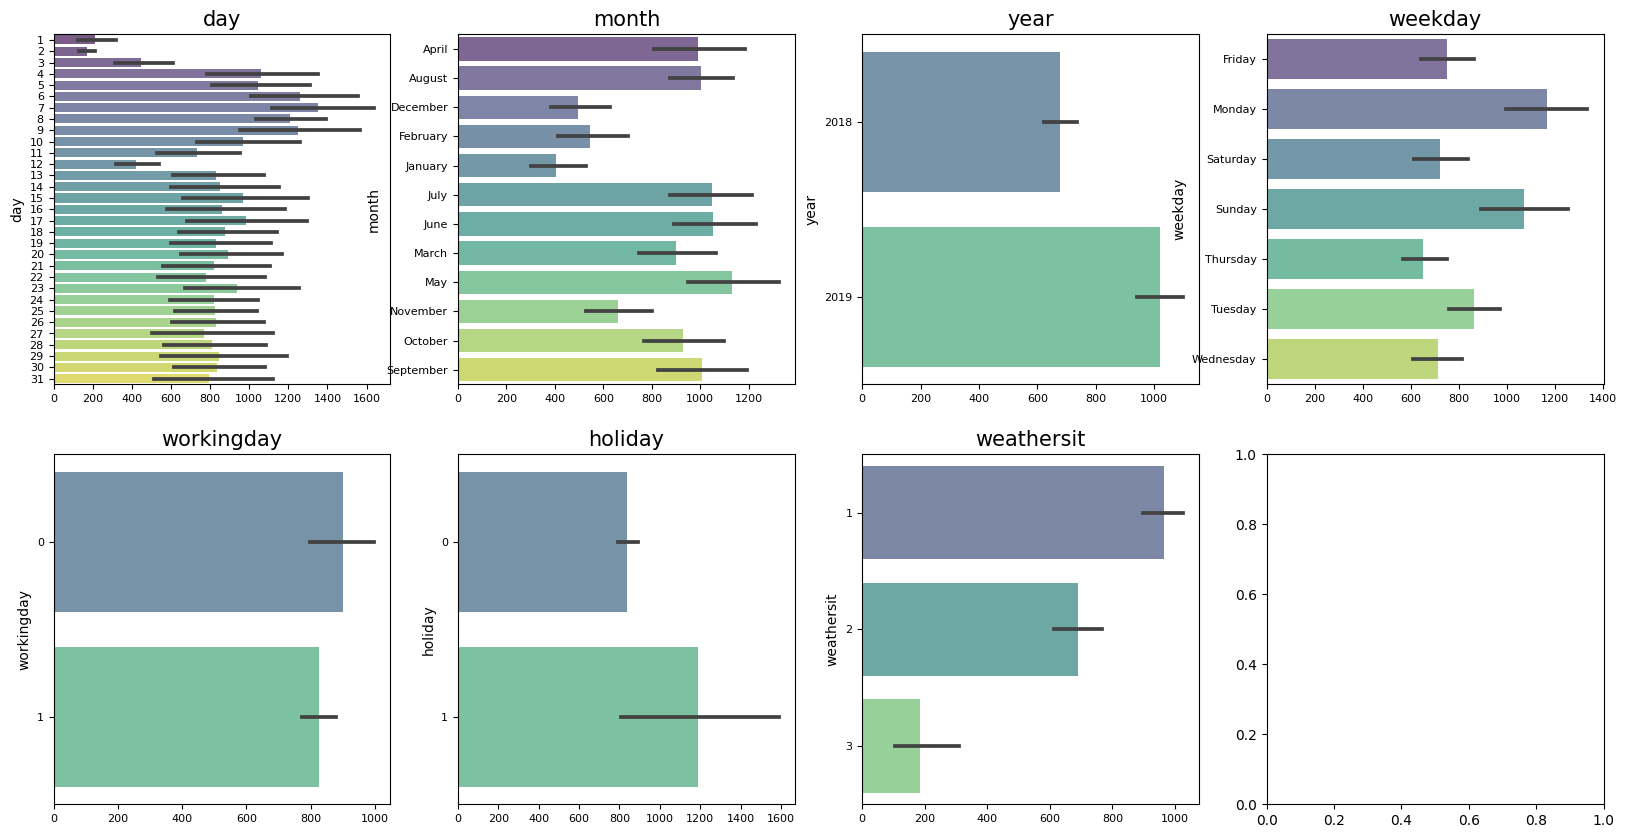

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

axes = axes.flat
categoricas = df_final_estandar.select_dtypes(include = "category").columns

for i, colum in enumerate(categoricas): 
    sns.barplot(data = df_final_estandar, y = colum, x = "casual", alpha = 0.7, ax = axes[i], palette = "viridis")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

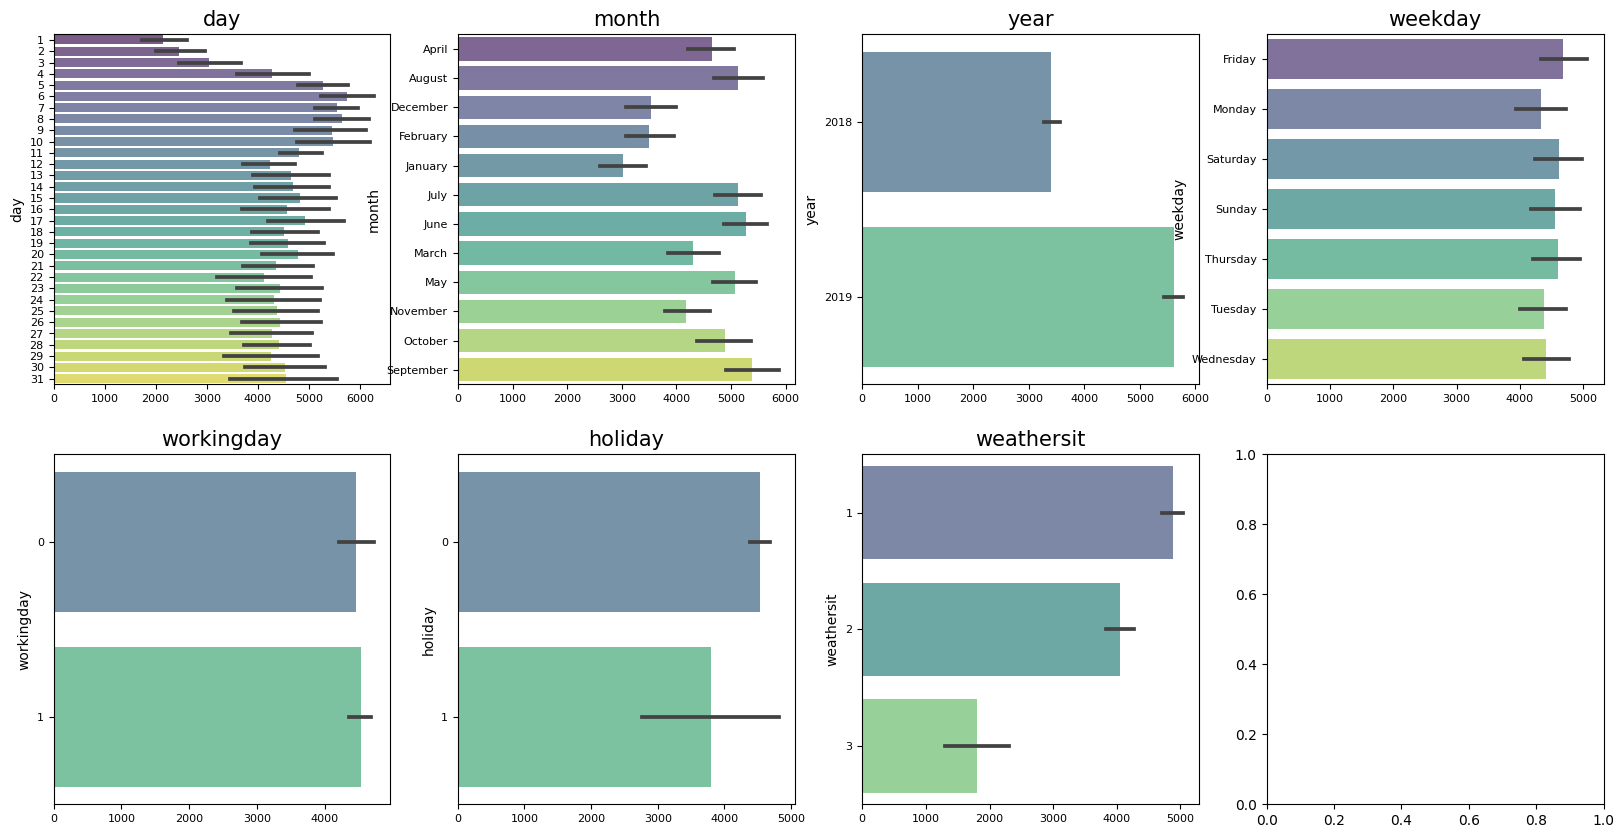

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

axes = axes.flat
categoricas = df_final_estandar.select_dtypes(include = "category").columns

for i, colum in enumerate(categoricas): 
    sns.barplot(data = df_final_estandar, y = colum, x = "cnt", alpha = 0.7, ax = axes[i], palette = "viridis")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

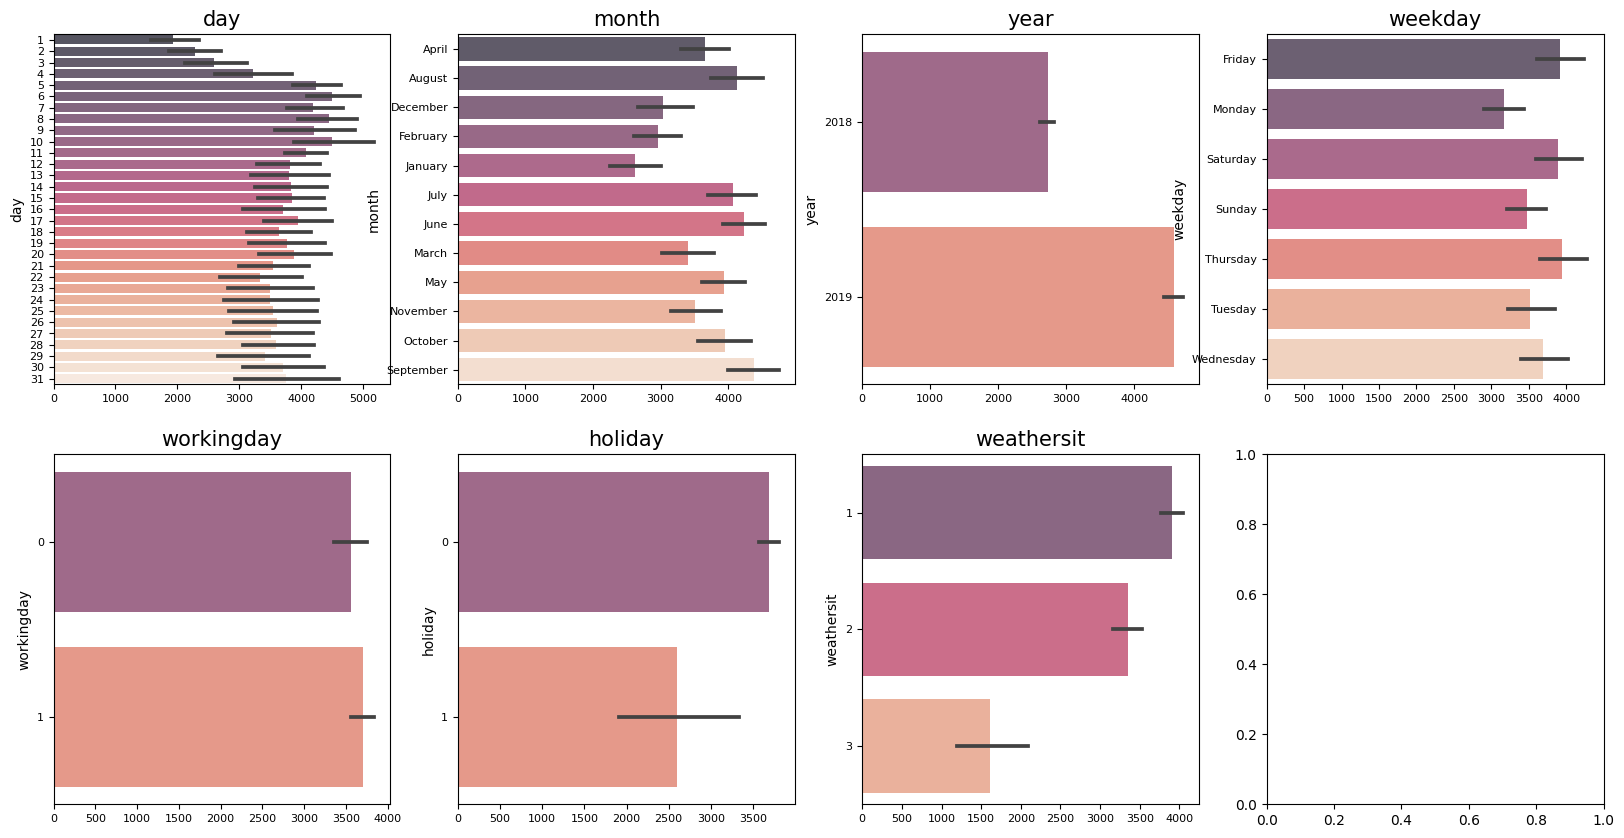

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

axes = axes.flat
categoricas = df_final_estandar.select_dtypes(include = "category").columns

for i, colum in enumerate(categoricas): 
    sns.barplot(data = df_final_estandar, y = colum, x = "registered", alpha = 0.7, ax = axes[i], palette = "rocket")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

In [24]:
df_final_estandar.drop(['day'], axis = 1, inplace = True)

In [25]:
df_casual = df_final_estandar.drop(['registered', 'cnt'],axis=1)
df_registered = df_final_estandar.drop(['casual', 'cnt'],axis=1)
df_cnt = df_final_estandar.drop(['registered', 'casual'],axis=1)

In [26]:
df_casual.to_pickle('../datos/bikes_casual.pkl')
df_registered.to_pickle('../datos/bikes_registered.pkl')
df_cnt.to_pickle('../datos/bikes_cnt.pkl')

In [28]:
import pickle

In [29]:
with open ("../datos/estandarizacion.pkl", "wb") as f:
    pickle.dump(scaler, f)